In [1]:
import numpy as np
import pandas as pd

from fbprophet import Prophet

import chess_stats as cs

In [2]:
#choose chess.com username to get data  
df = cs.game_stats_df('cesdaycart')

In [3]:
def forecast_rating(df, rules='chess', time_class='blitz', periods=30):
    #filter by chess game type and time control
    df = df[(df['rules'] == rules) & (df['time_class'] == time_class)]

    #convert end_time column to a date time object in order to resample
    df['end_time'] = pd.to_datetime(df['end_time'])

    #resample the data by day and take the mean rating. Forward fill NA values.
    ts_daily_df = df.resample('D', on='end_time').mean().fillna(method='ffill')[['player_rating']]

    #create new data frame which contains only the timesteps and ratings, named 'ds' and 'y' respectively. Prophet
    ts = pd.DataFrame({'ds':ts_daily_df.index, 'y': ts_daily_df.values.flatten()})
    
    #instanciate prophet object
    model = Prophet()

    #fit model to created dataframe
    model.fit(ts)

    #create dataframe containing future timesteps a year into the future
    future = model.make_future_dataframe(periods=periods)

    #make predictions on the future timesteps
    forecast = model.predict(future)
    
    forecast['ds'] = pd.to_datetime(forecast['ds'])
    
    return forecast.set_index('ds')

In [4]:
#filter by chess game type and time control
df = df[(df['rules'] == 'chess') & (df['time_class'] == 'blitz')]

#convert end_time column to a date time object in order to resample
df['end_time'] = pd.to_datetime(df['end_time'])

#resample the data by day and take the mean rating. Forward fill NA values.
ts_daily_df = df.resample('D', on='end_time').mean().fillna(method='ffill')[['player_rating']]

#create new data frame which contains only the timesteps and ratings, named 'ds' and 'y' respectively. Prophet
ts = pd.DataFrame({'ds':ts_daily_df.index, 'y': ts_daily_df.values.flatten()})

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/envs/python3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


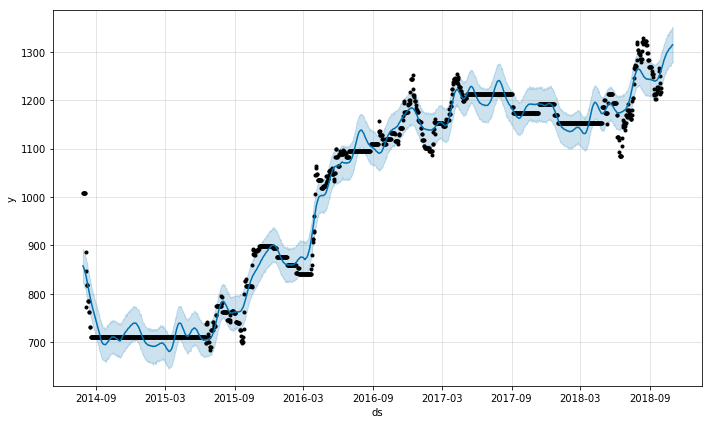

In [5]:
#instanciate prophet object
model = Prophet()

#fit model to created dataframe
model.fit(ts)

#create dataframe containing future timesteps a year into the future
future = model.make_future_dataframe(periods=30)

#make predictions on the future timesteps
forecast = model.predict(future)

#plot the forecast
a = model.plot(forecast)

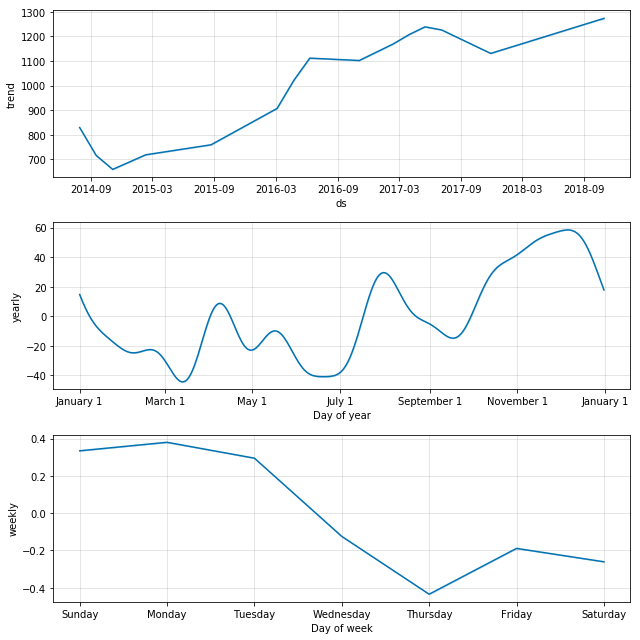

In [7]:
#plot the different components of the forecast (trend, yearly, weekly)
b = model.plot_components(forecast)

In [5]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-07-28,822.287676,819.469132,885.215853,822.287676,822.287676,29.930832,29.930832,29.930832,0.600535,0.600535,0.600535,29.330297,29.330297,29.330297,0.0,0.0,0.0,852.218508
1,2014-07-29,820.151508,817.972246,883.070613,820.151508,820.151508,30.562968,30.562968,30.562968,0.194293,0.194293,0.194293,30.368675,30.368675,30.368675,0.0,0.0,0.0,850.714476
2,2014-07-30,818.015341,816.962293,883.953000,818.015341,818.015341,30.787924,30.787924,30.787924,-0.286362,-0.286362,-0.286362,31.074287,31.074287,31.074287,0.0,0.0,0.0,848.803265
3,2014-07-31,815.879173,813.106905,878.383737,815.879173,815.879173,30.896886,30.896886,30.896886,-0.553038,-0.553038,-0.553038,31.449924,31.449924,31.449924,0.0,0.0,0.0,846.776059
4,2014-08-01,813.743006,811.112582,878.715140,813.743006,813.743006,31.320791,31.320791,31.320791,-0.182995,-0.182995,-0.182995,31.503787,31.503787,31.503787,0.0,0.0,0.0,845.063797


/anaconda3/envs/python3/lib/python3.6/site-packages/_pytest/fixtures.py:844: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  params = attr.ib(convert=attr.converters.optional(tuple))
/anaconda3/envs/python3/lib/python3.6/site-packages/_pytest/fixtures.py:846: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  ids = attr.ib(default=None, convert=_ensure_immutable_ids)


In [6]:
forecast[['yhat_lower', 'yhat_upper', 'yhat']]

,yhat_lower,yhat_upper,yhat
0,819.469132,885.215853,852.218508
1,817.972246,883.070613,850.714476
2,816.962293,883.953000,848.803265
3,813.106905,878.383737,846.776059
4,811.112582,878.715140,845.063797
5,808.813902,875.348338,842.687590
6,805.028352,872.860560,840.570961
7,803.055848,872.493861,837.826301
8,800.625835,864.957140,834.228786
9,796.778446,862.718778,830.343681


In [45]:
forecast_df = forecast_rating(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/envs/python3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [52]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-07-28,824.766904,819.418643,886.509650,824.766904,824.766904,29.545998,29.545998,29.545998,0.460619,0.460619,0.460619,29.085380,29.085380,29.085380,0.0,0.0,0.0,854.312902
1,2014-07-29,822.474700,818.159495,885.398822,822.474700,822.474700,30.356433,30.356433,30.356433,0.161700,0.161700,0.161700,30.194732,30.194732,30.194732,0.0,0.0,0.0,852.831133
2,2014-07-30,820.182497,818.487779,881.921811,820.182497,820.182497,30.708180,30.708180,30.708180,-0.259331,-0.259331,-0.259331,30.967511,30.967511,30.967511,0.0,0.0,0.0,850.890677
3,2014-07-31,817.890293,814.481020,883.150194,817.890293,817.890293,30.875212,30.875212,30.875212,-0.529769,-0.529769,-0.529769,31.404981,31.404981,31.404981,0.0,0.0,0.0,848.765505
4,2014-08-01,815.598090,813.507610,882.037980,815.598090,815.598090,31.363278,31.363278,31.363278,-0.150652,-0.150652,-0.150652,31.513930,31.513930,31.513930,0.0,0.0,0.0,846.961368
5,2014-08-02,813.305886,807.289453,876.302267,813.305886,813.305886,31.212680,31.212680,31.212680,-0.093761,-0.093761,-0.093761,31.306441,31.306441,31.306441,0.0,0.0,0.0,844.518566
6,2014-08-03,811.013683,811.583069,875.909472,811.013683,811.013683,31.210745,31.210745,31.210745,0.411194,0.411194,0.411194,30.799551,30.799551,30.799551,0.0,0.0,0.0,842.224428
7,2014-08-04,808.721479,804.639565,871.598499,808.721479,808.721479,30.475402,30.475402,30.475402,0.460619,0.460619,0.460619,30.014783,30.014783,30.014783,0.0,0.0,0.0,839.196881
8,2014-08-05,806.429276,802.112252,869.463333,806.429276,806.429276,29.139300,29.139300,29.139300,0.161700,0.161700,0.161700,28.977599,28.977599,28.977599,0.0,0.0,0.0,835.568575
9,2014-08-06,804.137072,798.962915,865.838481,804.137072,804.137072,27.457423,27.457423,27.457423,-0.259331,-0.259331,-0.259331,27.716755,27.716755,27.716755,0.0,0.0,0.0,831.594496
